In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import imageio
import os

In [2]:
def initialize_grid(M, N, I0):
    grid = np.zeros((M, N), dtype=int)
    infected_positions = np.random.choice(M * N, I0, replace=False)
    for pos in infected_positions:
        grid[pos // N, pos % N] = 1  # Posiciones iniciales de infectados
    return grid

In [3]:
def count_infected_neighbors(grid, i, j, rad):
    M, N = grid.shape
    infected_count = 0
    for x in range(max(0, i - rad), min(M, i + rad + 1)):
        for y in range(max(0, j - rad), min(N, j + rad + 1)):
            if (x, y) != (i, j) and grid[x, y] == 1:
                infected_count += 1
    return infected_count

In [4]:
def update_state(grid, i, j, beta, gamma, rad):
    if grid[i, j] == 0:  # Susceptible
        infected_neighbors = count_infected_neighbors(grid, i, j, rad)
        if np.random.rand() < beta * infected_neighbors:
            return 1  # Se infecta
    elif grid[i, j] == 1:  # Infectado
        if np.random.rand() < gamma:
            return 2  # Se recupera
    return grid[i, j]


In [5]:
def simulate_SIR(M, N, T, I0, rad, beta, gamma):
    grid = initialize_grid(M, N, I0)
    history = [grid.copy()]
    S_counts, I_counts, R_counts = [np.sum(grid == 0)], [np.sum(grid == 1)], [np.sum(grid == 2)]
    
    for t in range(T):
        new_grid = grid.copy()
        for i in range(M):
            for j in range(N):
                new_grid[i, j] = update_state(grid, i, j, beta, gamma, rad)
        grid = new_grid
        history.append(grid.copy())
        S_counts.append(np.sum(grid == 0))
        I_counts.append(np.sum(grid == 1))
        R_counts.append(np.sum(grid == 2))
    
    return history, S_counts, I_counts, R_counts


In [6]:
# Parámetros de la simulación
M, N = 100, 100     # Tamaño de la población
T = 250             # Tiempo de simulación
I0 = 2              # Número inicial de celdas infectadas
rad = 1             # Radio de interacción
beta = 0.1          # Probabilidad de infección
gamma = 0.25        # Probabilidad de recuperación

# Ejecutar la simulación
history, S_counts, I_counts, R_counts = simulate_SIR(M, N, T, I0, rad, beta, gamma)

In [7]:
# Función para graficar el grid en diferentes momentos de tiempo
def plot_grid_snapshots(history, times=[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]):
    fig, axes = plt.subplots(1, len(times), figsize=(15, 3))
    for ax, t in zip(axes, times):
        ax.imshow(history[t], cmap='viridis', vmin=0, vmax=2)
        ax.set_title(f'Tiempo {t}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

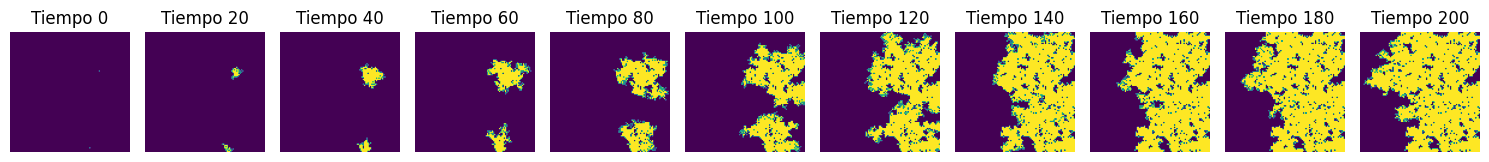

In [34]:
# Graficar snapshots del grid
plot_grid_snapshots(history)

In [11]:
# Crear y guardar las imágenes de los snapshots
def create_gif_from_history(history, output_filename='sir_simulation.gif', duration=0.1):
    filenames = []
    
    for t in range(len(history)):
        plt.figure(figsize=(5, 5))
        plt.imshow(history[t], cmap='viridis', vmin=0, vmax=2)
        plt.title(f'Tiempo {t}')
        plt.axis('off')
        
        # Guardar cada snapshot como una imagen temporal
        filename = f'temp_{t}.png'
        plt.savefig(filename)
        filenames.append(filename)
        plt.close()
    
    # Crear el gif
    with imageio.get_writer(output_filename, mode='I', duration=duration) as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)
    
    # Eliminar las imágenes temporales
    for filename in filenames:
        os.remove(filename)
    
    print(f'GIF guardado como {output_filename}')

create_gif_from_history(history)

C:\Users\eunic\AppData\Local\Temp\ipykernel_25920\2463401697.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


GIF guardado como sir_simulation.gif


In [29]:
Poblacion = M * N
# Condiciones iniciales P2
S = float(Poblacion - I0)  # Susceptibles iniciales
I = float(I0)              # Infectados iniciales
R = 0.0                    # Recuperados iniciales

In [30]:
T = 250
t = np.linspace(0, T, T)

In [31]:
# Vectores para almacenar los resultados
S_t = np.zeros(T)
I_t = np.zeros(T)
R_t = np.zeros(T)

S_t[0] = S
I_t[0] = I
R_t[0] = R

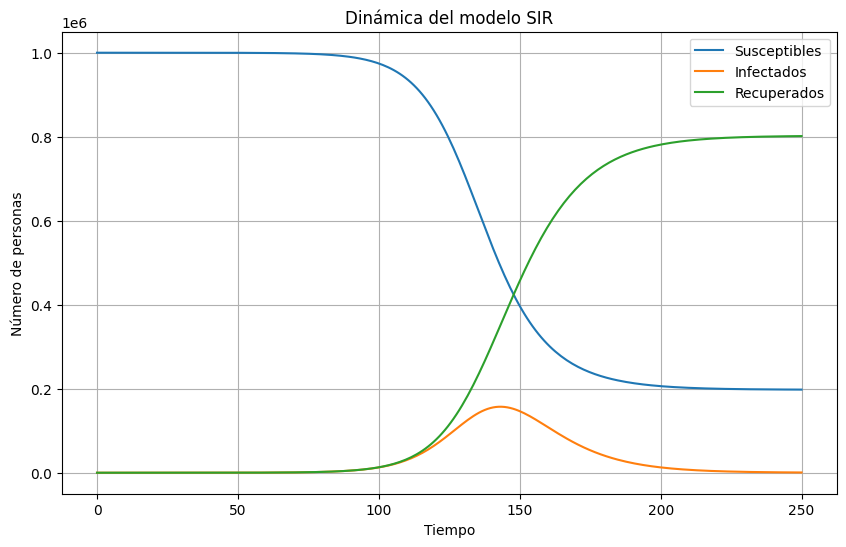

In [32]:
# Simulación del modelo SIR
for time in range(1, T):
    new_infected = (beta * S * I) / Poblacion
    new_recovered = gamma * I
    
    S = S - new_infected
    I = I + new_infected - new_recovered
    R = R + new_recovered
    
    S_t[time] = S
    I_t[time] = I
    R_t[time] = R

# Graficar los resultados
plt.figure(figsize=(10,6))
plt.plot(t, S_t, label='Susceptibles')
plt.plot(t, I_t, label='Infectados')
plt.plot(t, R_t, label='Recuperados')
plt.xlabel('Tiempo')
plt.ylabel('Número de personas')
plt.legend()
plt.title('Dinámica del modelo SIR')
plt.grid(True)
plt.show()

## EJERCICIO 2

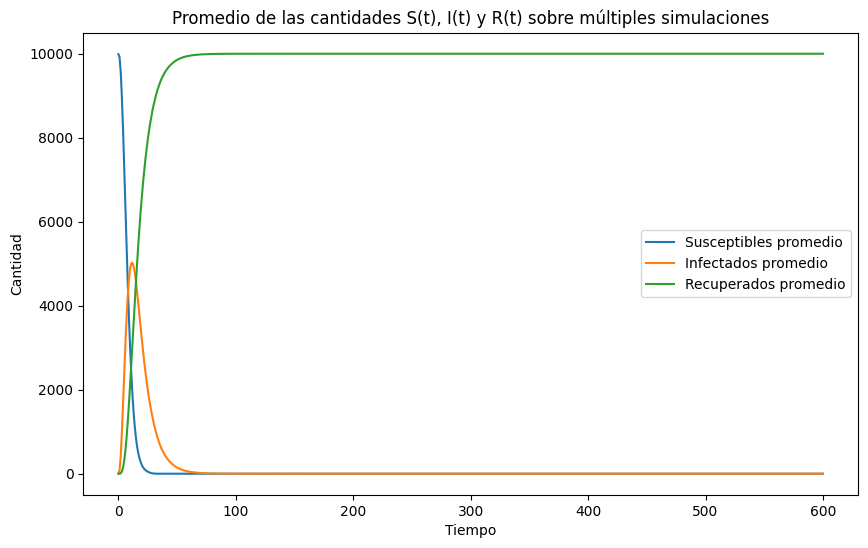

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_multiple_SIR(Nexp, M, N, T, I0, rad, beta, gamma):
    S_counts_all = np.zeros((Nexp, T + 1))
    I_counts_all = np.zeros((Nexp, T + 1))
    R_counts_all = np.zeros((Nexp, T + 1))
    
    for exp in range(Nexp):
        _, S_counts, I_counts, R_counts = simulate_SIR(M, N, T, I0, rad, beta, gamma)
        S_counts_all[exp, :] = S_counts
        I_counts_all[exp, :] = I_counts
        R_counts_all[exp, :] = R_counts
    
    S_avg = np.mean(S_counts_all, axis=0)
    I_avg = np.mean(I_counts_all, axis=0)
    R_avg = np.mean(R_counts_all, axis=0)
    
    return S_avg, I_avg, R_avg


M = 100  
N = 100  
T = 600  
I0 = 10 
rad = 2 
beta = 0.3  
gamma = 0.1 
Nexp = 100  


S_avg, I_avg, R_avg = simulate_multiple_SIR(Nexp, M, N, T, I0, rad, beta, gamma)


plt.figure(figsize=(10, 6))
plt.plot(S_avg, label='Susceptibles promedio')
plt.plot(I_avg, label='Infectados promedio')
plt.plot(R_avg, label='Recuperados promedio')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad')
plt.legend()
plt.title('Promedio de las cantidades S(t), I(t) y R(t) sobre múltiples simulaciones')
plt.show()


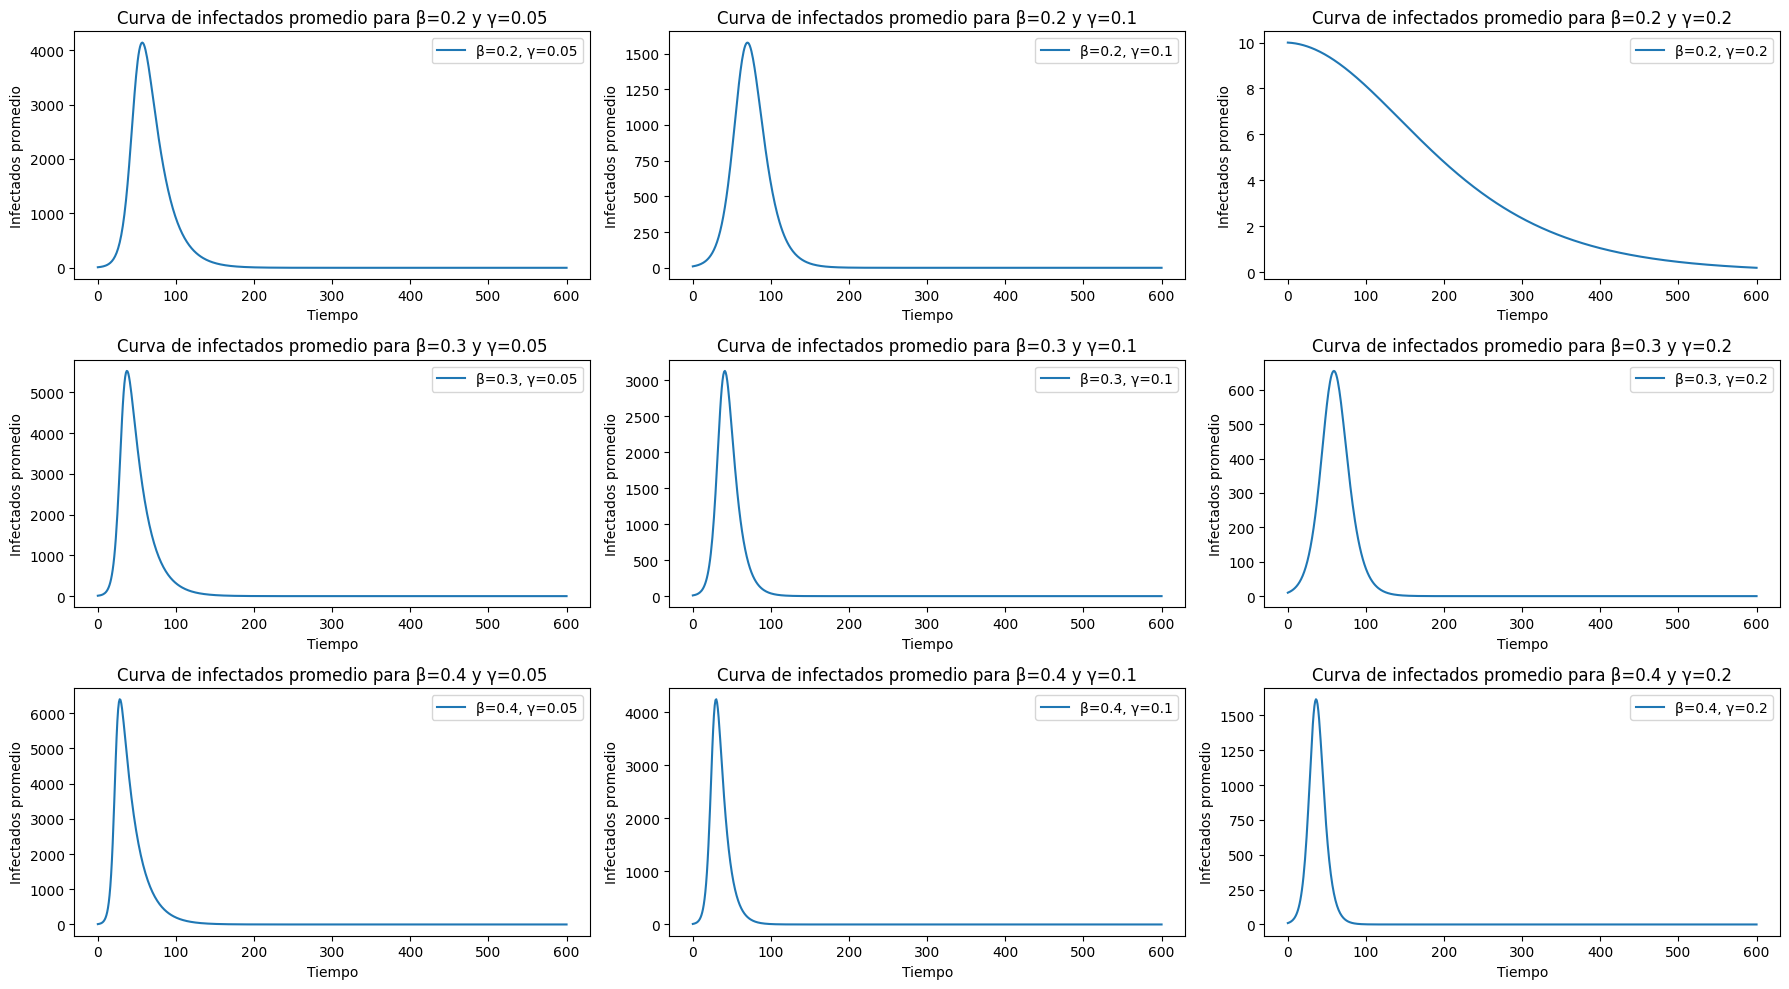

In [13]:
import numpy as np
import matplotlib.pyplot as plt


def simulate_SIR(M, N, T, I0, rad, beta, gamma):
    S = M * N - I0
    I = I0
    R = 0
    
    S_counts = np.zeros(T + 1)
    I_counts = np.zeros(T + 1)
    R_counts = np.zeros(T + 1)
    
    S_counts[0] = S
    I_counts[0] = I
    R_counts[0] = R
    
    for t in range(1, T + 1):
        new_infected = beta * S * I / (M * N)
        new_recovered = gamma * I
        
        S = S - new_infected
        I = I + new_infected - new_recovered
        R = R + new_recovered
        
        S_counts[t] = S
        I_counts[t] = I
        R_counts[t] = R
    
    return np.arange(T + 1), S_counts, I_counts, R_counts


def simulate_multiple_SIR(Nexp, M, N, T, I0, rad, beta, gamma):
    S_counts_all = np.zeros((Nexp, T + 1))
    I_counts_all = np.zeros((Nexp, T + 1))
    R_counts_all = np.zeros((Nexp, T + 1))
    
    for exp in range(Nexp):
        _, S_counts, I_counts, R_counts = simulate_SIR(M, N, T, I0, rad, beta, gamma)
        S_counts_all[exp, :] = S_counts
        I_counts_all[exp, :] = I_counts
        R_counts_all[exp, :] = R_counts
    
    S_avg = np.mean(S_counts_all, axis=0)
    I_avg = np.mean(I_counts_all, axis=0)
    R_avg = np.mean(R_counts_all, axis=0)
    
    return S_avg, I_avg, R_avg


M = 100  
N = 100  
T = 600  
I0 = 10 
rad = 2 
Nexp = 100


beta_values = [0.2, 0.3, 0.4]
gamma_values = [0.05, 0.1, 0.2]

plt.figure(figsize=(18, 10))

for i, beta in enumerate(beta_values):
    for j, gamma in enumerate(gamma_values):
        S_avg, I_avg, R_avg = simulate_multiple_SIR(Nexp, M, N, T, I0, rad, beta, gamma)
        
        plt.subplot(len(beta_values), len(gamma_values), i * len(gamma_values) + j + 1)
        plt.plot(I_avg, label=f'β={beta}, γ={gamma}')
        plt.xlabel('Tiempo')
        plt.ylabel('Infectados promedio')
        plt.legend()
        plt.title(f'Curva de infectados promedio para β={beta} y γ={gamma}')

plt.tight_layout()
plt.show()


